In [ ]:
# labels
labels_file = "../support_files/labels.csv"

# eeg data
# control, 82 participants, 2 not OK (5f032914-45ac-4aac-b59b-1dac8f029a40, 6811a133-8d7c-4962-9661-3fa29230ce3f)
# test, 37 participants, 3 not OK (e57b2be7-98a8-4a19-8d1b-065000ae0dce, ec1f9fe0-8ded-4751-8279-4a1e881a41b1, 16919a1d-17aa-4a54-9872-d3940cf7e7d7)
# eeg data already underwent some basic preprocessing in Natus NeuroWorks EEG
# lowpass filter 1 Hz, highpass filter 70 Hz, notch filter 50 Hz
data_file = "../../ped_neuro_eeg_data/export/control/C-001.txt" # or test

In [ ]:
import pandas as pd

# labels
labels_df = pd.read_csv(labels_file)

# filter to keep only EEG channels (description is "EEG"),
eeg_labels = labels_df[(labels_df["description"] == "EEG")]

In [ ]:
# load the data file
data_lines = []
with open(data_file, "r", encoding="UTF-16") as f:
    for line in f:
        if not line.startswith("%"): # skip comment lines
            data_lines.append(line.strip())

# parse the data into a DataFrame
columns = ["Date.Time", "EB", "Stamp"] + [f"C{str(i).zfill(3)}" for i in range(1, 36)] + ["PHOTIC"]
data = pd.DataFrame([line.split("\t") for line in data_lines], columns=columns)

# extract EEG data
eeg_data = data[eeg_labels["channel"]].values.T # transpose for MNE compatibility


Creating RawArray with float64 data, n_channels=21, n_times=306762
    Range : 0 ... 306761 =      0.000 ...  1227.044 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


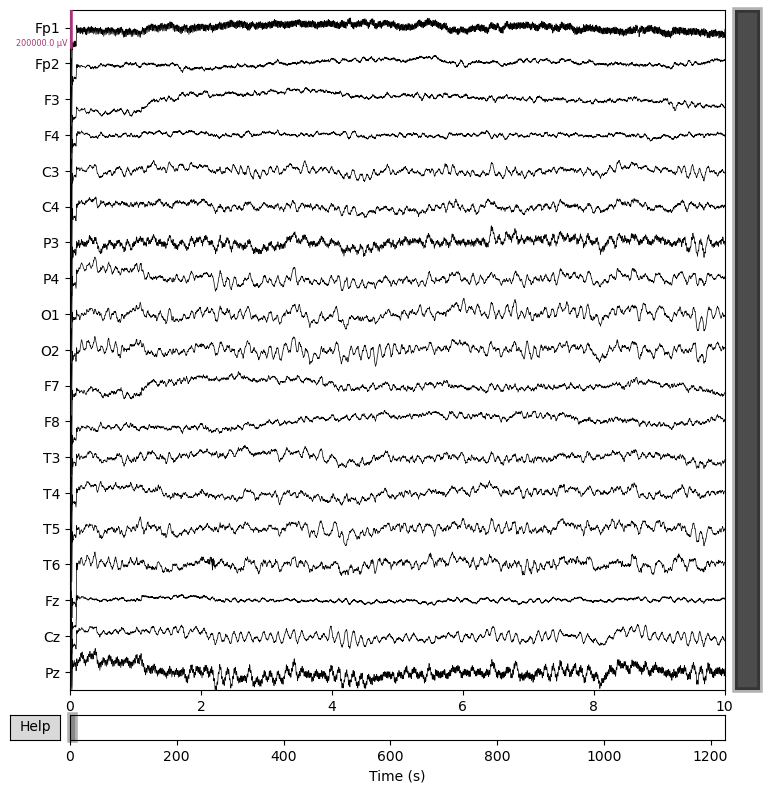

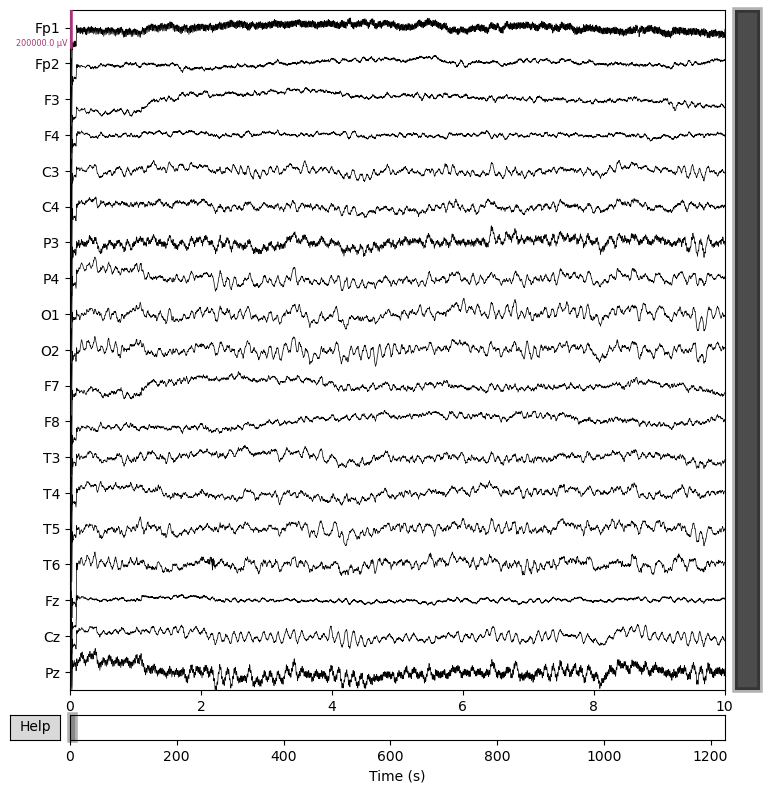

In [ ]:
import mne

# create an MNE RawArray
sfreq = 250 # sampling frequency from the data.txt header
ch_names = eeg_labels["label"].tolist()
ch_types = ["eeg"] * len(ch_names)

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(eeg_data, info)

# plot all but A1 and A2
channels_to_plot = [ch for ch in raw.info["ch_names"] if ch not in ["A1", "A2"]]
raw_selected = raw.copy().pick_channels(channels_to_plot)
raw_selected.plot(scalings={"eeg": 10e-2})